In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

sgd_fs = [f for f in os.listdir() if f.endswith('.npy') and ('sgd.' in f) and 'sc' not in f and '2f' not in f and '_0.5_' in f]
sgd_fs = sorted(sgd_fs, reverse=True, key=lambda x: float(x.split('_')[1]))
print(sgd_fs)

sgd_only_fs = [f for f in os.listdir() if f.endswith('.npy') and ('sgd_only.' in f) and 'sc' not in f and '2f' not in f and '_0.5_' in f]
sgd_only_fs = sorted(sgd_only_fs, reverse=True, key=lambda x: float(x.split('_')[1]))
print(sgd_only_fs)

['0.06715755092838585_148.50231311052923_0.5_100_1000_sgd_sgd.npy', '0.07076237258008634_79.1450875968635_0.5_100_1000_sgd_sgd.npy', '0.08309350559981002_42.66161181432368_0.5_100_1000_sgd_sgd.npy', '0.12286153075815878_23.608281085170507_0.5_100_1000_sgd_sgd.npy', '0.26446476970547006_11.782551385093928_0.5_100_1000_sgd_sgd.npy', '0.5376811415476914_6.316444957455397_0.5_100_1000_sgd_sgd.npy', '1.0893754138051732_3.471385304113626_0.5_100_1000_sgd_sgd.npy', '2.1928318168082246_2.014108524380922_0.5_100_1000_sgd_sgd.npy', '4.404417915251583_1.2735604157817368_0.5_100_1000_sgd_sgd.npy', '8.683902720009716_0.884958509222269_0.5_100_1000_sgd_sgd.npy', '17.782134308712003_0.6353546683323383_0.5_100_1000_sgd_sgd.npy', '36.354829813981816_0.4683377470958233_0.5_100_1000_sgd_sgd.npy', '73.52944163350334_0.35104445285201075_0.5_100_1000_sgd_sgd.npy', '138.17495520243065_0.27233819592118264_0.5_100_1000_sgd_sgd.npy', '204.44834696869526_0.227453026791811_0.5_100_1000_sgd_sgd.npy', '303.29606611

In [2]:
epsilon_range = [np.load(file, allow_pickle=True)[0] for file in sgd_fs]
losses = [np.load(file, allow_pickle=True)[1] for file in sgd_fs]
gap = [np.load(file, allow_pickle=True)[2] for file in sgd_fs]
ratio = [np.load(file, allow_pickle=True)[3] for file in sgd_fs]

losses_shadow = [np.load(file, allow_pickle=True)[4] for file in sgd_fs]
ratio_shadow = [np.load(file, allow_pickle=True)[5] for file in sgd_fs]

loss_precision = [np.load(file, allow_pickle=True)[6] for file in sgd_fs]
ratio_precision = [np.load(file, allow_pickle=True)[7] for file in sgd_fs]

loss_precision_calibrate = [np.load(file, allow_pickle=True)[8] for file in sgd_fs]
ratio_precision_calibrate = [np.load(file, allow_pickle=True)[9] for file in sgd_fs]

loss_precision_shadow = [np.load(file, allow_pickle=True)[10] for file in sgd_fs]
ratio_precision_shadow = [np.load(file, allow_pickle=True)[11] for file in sgd_fs]

nup_losses = [np.load(file, allow_pickle=True)[12] for file in sgd_fs]
nup_gap = [np.load(file, allow_pickle=True)[13] for file in sgd_fs]

nup_losses_shadow = [np.load(file, allow_pickle=True)[14] for file in sgd_fs]

nup_loss_precision = [np.load(file, allow_pickle=True)[15] for file in sgd_fs]

nup_loss_precision_shadow = [np.load(file, allow_pickle=True)[16] for file in sgd_fs]

nup_loss_precision_calibrate = [np.load(file, allow_pickle=True)[17] for file in sgd_fs]

initial_train_acc = [np.load(file, allow_pickle=True)[18] for file in sgd_fs]
initial_test_acc = [np.load(file, allow_pickle=True)[19] for file in sgd_fs]
post_train_acc = [np.load(file, allow_pickle=True)[20] for file in sgd_fs]
post_test_acc = [np.load(file, allow_pickle=True)[21] for file in sgd_fs]

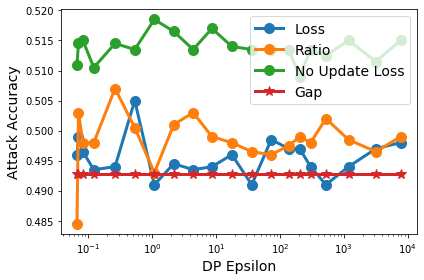

In [3]:
ds = epsilon_range

plt.plot(ds, [np.mean(x) for x in losses], 
         'o', label='Loss', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in ratio], 
         'o', label='Ratio', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in nup_losses], 
         'o', label='No Update Loss', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in gap], 
         '*', label='Gap', 
         linestyle='-', linewidth=3, markersize=10)
ax = plt.gca()
ax.set_xscale("log")
plt.xlabel('DP Epsilon', fontsize=14)
plt.ylabel('Attack Accuracy', fontsize=14) 
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('fmnist_dpsgd_sgd_accuracy.png', bbox_inches="tight")
plt.show()

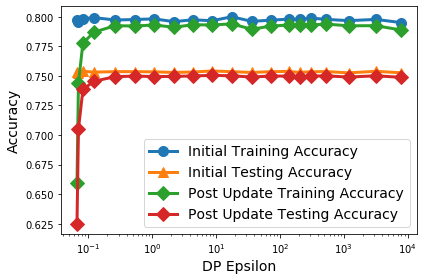

In [4]:
plt.plot(ds, [np.mean(x) for x in initial_train_acc], 
         'o', label='Initial Training Accuracy', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in initial_test_acc], 
         '^', label='Initial Testing Accuracy', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in post_train_acc], 
         'D', label='Post Update Training Accuracy', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in post_test_acc], 
         'D', label='Post Update Testing Accuracy', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('DP Epsilon', fontsize=14)
plt.ylabel('Accuracy', fontsize=14) 
ax = plt.gca()
ax.set_xscale('log')
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

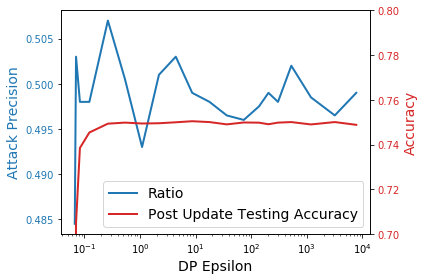

In [5]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('DP Epsilon', fontsize=14)
ax1.set_ylabel('Attack Precision', fontsize=14, color='tab:blue')
l1 = plt.plot(ds, [np.mean(x) for x in ratio],
         'o', label='Ratio', 
         linestyle='-', linewidth=2, markersize=0, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Accuracy', color='tab:red', fontsize=14)  # we already handled the x-label with ax1
l2 = plt.plot(ds, [np.mean(x) for x in post_test_acc], 
         'D', label='Post Update Testing Accuracy', 
         linestyle='-', linewidth=2, markersize=0, color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylim(0.7, 0.8)

ax = plt.gca()

ax.set_xscale("log")
ax.legend(handles=l1+l2, loc='lower right', fontsize=14)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('fmnist_dpsgd_accuracy_acc_sgd_full', bbox_inches="tight")
plt.show()

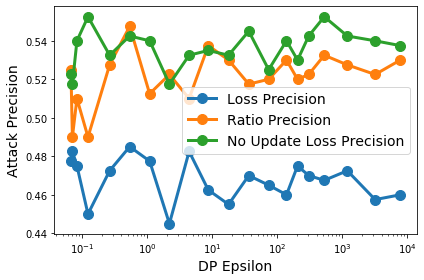

In [6]:
plt.plot(ds, [np.mean([i[0] for i in x]) for x in loss_precision], 
         'o', label='Loss Precision', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean([i[0] for i in x]) for x in ratio_precision], 
         'o', label='Ratio Precision', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean([i[0] for i in x]) for x in nup_loss_precision], 
         'o', label='No Update Loss Precision', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('DP Epsilon', fontsize=14)
plt.ylabel('Attack Precision', fontsize=14) 
ax = plt.gca()
ax.set_xscale('log')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('fmnist_dpsgd_sgd_precision.png', bbox_inches="tight")
plt.show()

In [7]:
epsilon_range = [np.load(file, allow_pickle=True)[0] for file in sgd_only_fs]
losses = [np.load(file, allow_pickle=True)[1] for file in sgd_only_fs]
gap = [np.load(file, allow_pickle=True)[2] for file in sgd_only_fs]
ratio = [np.load(file, allow_pickle=True)[3] for file in sgd_only_fs]

losses_shadow = [np.load(file, allow_pickle=True)[4] for file in sgd_only_fs]
ratio_shadow = [np.load(file, allow_pickle=True)[5] for file in sgd_only_fs]

loss_precision = [np.load(file, allow_pickle=True)[6] for file in sgd_only_fs]
ratio_precision = [np.load(file, allow_pickle=True)[7] for file in sgd_only_fs]

loss_precision_calibrate = [np.load(file, allow_pickle=True)[8] for file in sgd_only_fs]
ratio_precision_calibrate = [np.load(file, allow_pickle=True)[9] for file in sgd_only_fs]

loss_precision_shadow = [np.load(file, allow_pickle=True)[10] for file in sgd_only_fs]
ratio_precision_shadow = [np.load(file, allow_pickle=True)[11] for file in sgd_only_fs]

nup_losses = [np.load(file, allow_pickle=True)[12] for file in sgd_only_fs]
nup_gap = [np.load(file, allow_pickle=True)[13] for file in sgd_only_fs]

nup_losses_shadow = [np.load(file, allow_pickle=True)[14] for file in sgd_only_fs]

nup_loss_precision = [np.load(file, allow_pickle=True)[15] for file in sgd_only_fs]

nup_loss_precision_shadow = [np.load(file, allow_pickle=True)[16] for file in sgd_only_fs]

nup_loss_precision_calibrate = [np.load(file, allow_pickle=True)[17] for file in sgd_only_fs]

initial_train_acc = [np.load(file, allow_pickle=True)[18] for file in sgd_only_fs]
initial_test_acc = [np.load(file, allow_pickle=True)[19] for file in sgd_only_fs]
post_train_acc = [np.load(file, allow_pickle=True)[20] for file in sgd_only_fs]
post_test_acc = [np.load(file, allow_pickle=True)[21] for file in sgd_only_fs]

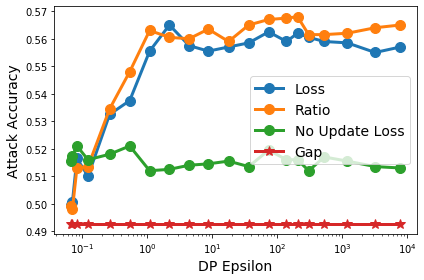

In [8]:
ds = epsilon_range

plt.plot(ds, [np.mean(x) for x in losses], 
         'o', label='Loss', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in ratio], 
         'o', label='Ratio', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in nup_losses], 
         'o', label='No Update Loss', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in gap], 
         '*', label='Gap', 
         linestyle='-', linewidth=3, markersize=10)
ax = plt.gca()
ax.set_xscale("log")
plt.xlabel('DP Epsilon', fontsize=14)
plt.ylabel('Attack Accuracy', fontsize=14) 
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('fmnist_dpsgd_sgd_only_accuracy.png', bbox_inches="tight")
plt.show()

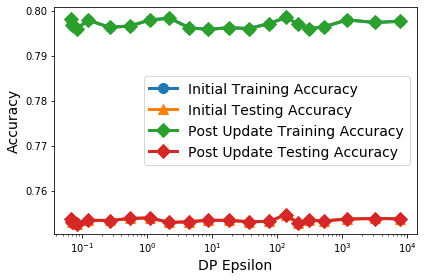

In [9]:
plt.plot(ds, [np.mean(x) for x in initial_train_acc], 
         'o', label='Initial Training Accuracy', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in initial_test_acc], 
         '^', label='Initial Testing Accuracy', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in post_train_acc], 
         'D', label='Post Update Training Accuracy', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in post_test_acc], 
         'D', label='Post Update Testing Accuracy', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('DP Epsilon', fontsize=14)
plt.ylabel('Accuracy', fontsize=14) 
ax = plt.gca()
ax.set_xscale('log')
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

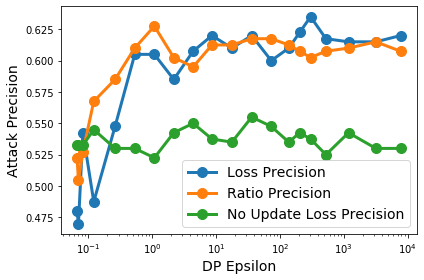

In [10]:
plt.plot(ds, [np.mean([i[0] for i in x]) for x in loss_precision], 
         'o', label='Loss Precision', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean([i[0] for i in x]) for x in ratio_precision], 
         'o', label='Ratio Precision', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean([i[0] for i in x]) for x in nup_loss_precision], 
         'o', label='No Update Loss Precision', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('DP Epsilon', fontsize=14)
plt.ylabel('Attack Precision', fontsize=14) 
ax = plt.gca()
ax.set_xscale('log')
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('fmnist_dpsgd_sgd_only_precision.png', bbox_inches="tight")
plt.show()

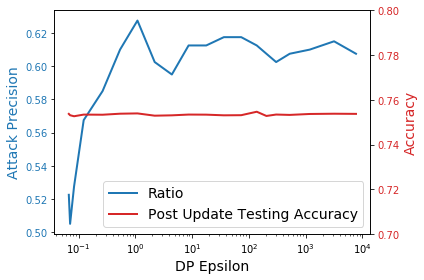

In [11]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('DP Epsilon', fontsize=14)
ax1.set_ylabel('Attack Precision', fontsize=14, color='tab:blue')
l1 = plt.plot(ds, [np.mean([i[0] for i in x]) for x in ratio_precision],
         'o', label='Ratio', 
         linestyle='-', linewidth=2, markersize=0, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Accuracy', color='tab:red', fontsize=14)  # we already handled the x-label with ax1
l2 = plt.plot(ds, [np.mean(x) for x in post_test_acc], 
         'D', label='Post Update Testing Accuracy', 
         linestyle='-', linewidth=2, markersize=0, color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylim(0.7, 0.8)

ax = plt.gca()
ax.set_xscale("log")
ax.legend(handles=l1+l2, loc='lower right', fontsize=14)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('fmnist_dpsgd_precision_acc_sgd_only', bbox_inches="tight")
plt.show()

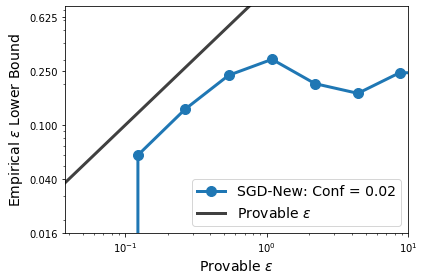

In [21]:
import math
from statsmodels.stats import proportion
import matplotlib.ticker

ratio_precision_sgd = [np.load(file, allow_pickle=True)[7] for file in sgd_fs]
ratio_precision_sgd_only = [np.load(file, allow_pickle=True)[7] for file in sgd_only_fs]

def lower_bound(precision, conf=0.02):
    precision = np.array([np.mean([i[0] for i in x]) for x in precision])
    total_samples = 400
    correct_cts = precision*total_samples
    precision_lb, _ = proportion.proportion_confint(correct_cts, total_samples, 2*conf, method='beta')
    
    return precision_lb

empirical_epsilon_lower_bound_sgd_only = [max(0, np.log(p)-np.log(1-p)) for p in lower_bound(ratio_precision_sgd_only)]
empirical_epsilon_lower_bound_sgd = [max(0, np.log(p)-np.log(1-p)) for p in lower_bound(ratio_precision_sgd)]

epsilon_lower_bound_sgd_only = [max(0, np.log(p)-np.log(1-p)) for p in [np.mean([i[0] for i in x]) for x in ratio_precision_sgd_only]]
epsilon_lower_bound_sgd = [max(0, np.log(p)-np.log(1-p)) for p in [np.mean([i[0] for i in x]) for x in ratio_precision_sgd]]

fig, ax = plt.subplots()
ax.plot(ds, empirical_epsilon_lower_bound_sgd_only, 
         'o', label=r'SGD-New: Conf = 0.02', 
         linestyle='-', linewidth=3, markersize=10)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label=r'Provable $\varepsilon$', linewidth=3)
ax.set_xlabel(r'Provable $\varepsilon$', fontsize=14)
ax.set_ylabel(r'Empirical $\varepsilon$ Lower Bound', fontsize=14) 
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(top=0.75)
ax.set_xlim(right=10)
ax.set_yticks([0.016, .04, .1, .25, .625])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('eps_lb.png', bbox_inches="tight")
plt.show()

In [13]:
print(ds)
print([f"{num:.3f}" for num in [np.mean([i[0] for i in x]) for x in loss_precision]])
print([f"{num:.3f}" for num in [np.mean([i[0] for i in x]) for x in ratio_precision]])
print([f"{num:.3f}" for num in [np.mean([i[0] for i in x]) for x in nup_loss_precision]])

[0.06715755092838585, 0.07076237258008634, 0.08309350559981002, 0.12286153075815878, 0.26446476970547006, 0.5376811415476914, 1.0893754138051732, 2.1928318168082246, 4.404417915251583, 8.683902720009716, 17.782134308712003, 36.354829813981816, 73.52944163350334, 138.17495520243065, 204.44834696869526, 303.29606611654197, 526.4900254494795, 1188.7237865698328, 3185.5371553202153, 7758.6070200152535]
['0.480', '0.470', '0.542', '0.487', '0.547', '0.605', '0.605', '0.585', '0.607', '0.620', '0.610', '0.620', '0.600', '0.610', '0.623', '0.635', '0.617', '0.615', '0.615', '0.620']
['0.523', '0.505', '0.528', '0.568', '0.585', '0.610', '0.627', '0.602', '0.595', '0.613', '0.613', '0.617', '0.618', '0.612', '0.608', '0.602', '0.608', '0.610', '0.615', '0.608']
['0.533', '0.532', '0.532', '0.545', '0.530', '0.530', '0.523', '0.543', '0.550', '0.537', '0.535', '0.555', '0.547', '0.535', '0.542', '0.537', '0.525', '0.543', '0.530', '0.530']
